In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_gaussian_quantiles

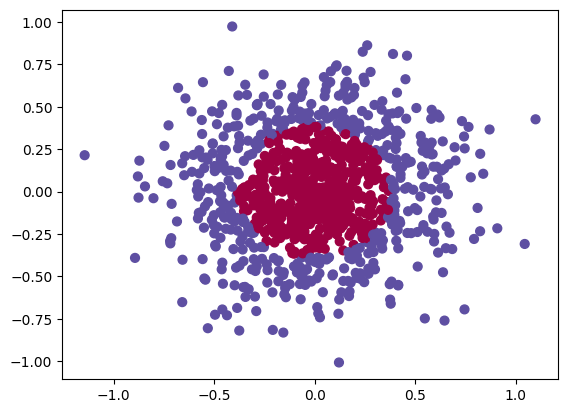

In [39]:
N = 1000
gaussian_quantiles = make_gaussian_quantiles(mean=None,
                                             cov=0.1,
                                             n_samples=N,
                                             n_features=2,
                                             n_classes=2, 
                                             shuffle=True,
                                             random_state=None)
X, Y = gaussian_quantiles
Y = Y[:,np.newaxis]
plt.scatter(X[:,0], X[:,1], c=Y[:,0], s=40, cmap=plt.cm.Spectral)

# Activation functions

In [40]:
def initialize_parameters_deep(layer_dims):
    #np.random.seed(1)
    parameters = {}
    L = len(layer_dims)         
    for l in range(0, L-1):
        parameters['W' + str(l+1)] = (np.random.rand(layer_dims[l], layer_dims[l+1]) * 2) - 1
        parameters['b' + str(l+1)] = (np.random.rand(1, layer_dims[l+1]) * 2) - 1
    return parameters

In [41]:
def sigmoid(x, derivate = False):
    if derivate:
        return np.exp(-x)/(( np.exp(-x) +1)**2)
    else:    
        return 1 / (1 + np.exp(-x))

def relu(x, derivate = False):
    if derivate:
        x[x<=0] = 0
        x[x>0] = 1
        return x
    else:    
        return np.maximum(0,x)

In [42]:
x = np.linspace(10,-10,100)

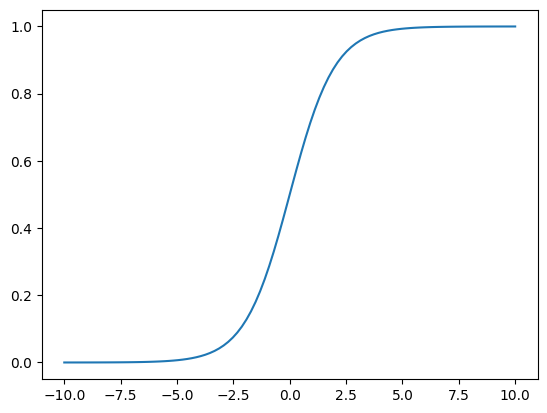

In [43]:
plt.plot(x,sigmoid(x))

# Loss function

In [44]:
def mse(y,y_hat,derivate=False):
    if derivate:
        return (y_hat - y)
    else:            
        return np.mean((y_hat - y)**2)

In [45]:
a = np.array([[2,3],
[2,3],
[2,3]])

In [46]:
a.shape

(3, 2)

In [47]:
b = np.array([[1,6,5,2],
             [1,2,7,0]])

In [48]:
b.shape

(2, 4)

In [49]:
np.matmul(a,b)

array([[ 5, 18, 31,  4],
       [ 5, 18, 31,  4],
       [ 5, 18, 31,  4]])

# Funcion de entrenamiento

In [50]:
def train(X_data,lr,params,training=True):
## Forward

    params['A0'] = X_data
        
    params['Z1'] = np.matmul(params['A0'],params['W1']) + params['b1']
    params['A1'] = relu(params['Z1'])
    
    params['Z2'] = np.matmul(params['A1'],params['W2']) + params['b2']
    params['A2'] = relu(params['Z2'])
       
    params['Z3'] = np.matmul(params['A2'],params['W3']) + params['b3']
    params['A3'] = sigmoid(params['Z3'])
  
    output = params['A3']
    
    if training:
    # Backpropagation
    
        params['dZ3'] =  mse(Y,output,True) * sigmoid(params['A3'],True)
        params['dW3'] = np.matmul(params['A2'].T,params['dZ3'])
        
        params['dZ2'] = np.matmul(params['dZ3'],params['W3'].T) * relu(params['A2'],True)
        params['dW2'] = np.matmul(params['A1'].T,params['dZ2'])
        
        params['dZ1'] = np.matmul(params['dZ2'],params['W2'].T) * relu(params['A1'],True)
        params['dW1'] = np.matmul(params['A0'].T,params['dZ1'])

        
        ## Gradinet Descent:
           
        params['W3'] = params['W3'] - params['dW3'] * lr
        params['b3'] = params['b3'] - (np.mean(params['dZ3'],axis=0, keepdims=True)) * lr
        
        params['W2'] = params['W2'] - params['dW2'] * lr
        params['b2'] = params['b2'] - (np.mean(params['dZ2'],axis=0, keepdims=True)) * lr
        
        params['W1'] = params['W1'] -params['dW1'] * lr
        params['b1'] = params['b1'] - (np.mean(params['dZ1'],axis=0, keepdims=True)) * lr
    
    return output

In [51]:
layer_dims =[2, 4, 8, 1]
params = initialize_parameters_deep(layer_dims)
errors = []
for _ in range(50000):
    output = train(X,0.001,params)
    if _ % 25 == 0:
        print(mse(Y,output))
        errors.append(mse(Y,output))

0.41859639642551055
0.2526570144563722
0.2512960310613529
0.25071853961990526
0.2504192599252943
0.2502440383175506
0.25013356536450365
0.2500598461873164
0.2500085281662326
0.2499719437078861
0.24994519366278603
0.2499251814463783
0.24990989343600287
0.2498979819352788
0.24988852260295943
0.2498808680036345
0.24987455631233513
0.24986925279663694
0.2498647113837411
0.2498607488709127
0.2498572272870373
0.24985404162219954
0.2498511111605567
0.24984837327388973
0.24984577892190368
0.24984185872368972
0.24983546929014194
0.24982590483054073
0.24980622188668225
0.2497322400449882
0.2490822994963283
0.247802514817828
0.24666753983545708
0.24527739858198386
0.2433288347384446
0.2405626691953835
0.23676810424939743
0.23198511353917003
0.2266726555524936
0.22176215354441
0.21737360453503174
0.2136508224005237
0.2091182381465898
0.19362041918161788
0.18563583148043283
0.1808928902254092
0.17728203579408852
0.1748367117408023
0.17306055493320593
0.1715915826606514
0.17049842150278266
0.1697922

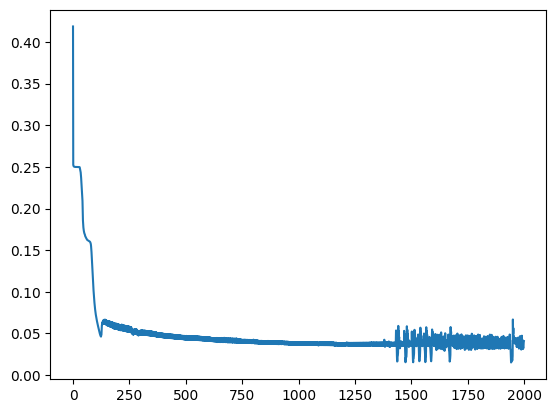

In [52]:
plt.plot(errors)